# importing necessary libraries for EDA

In [33]:
import re
import string
from nltk.corpus import stopwords

from collections import Counter

> if you get an error when importing stopwords, you should run these commands first

`import nltk`
`nltk.download('stopwords')` 

In [40]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# checking the data

In [7]:
df = pd.read_csv('data/train.csv', index_col='id')
df.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
df.isnull().sum() / df.count()

keyword     0.008077
location    0.498622
text        0.000000
target      0.000000
dtype: float64

location is 50% of the times empty.
therefore, we may need to check the correlation between having a location with the target variable

count of each label: target
0    4342
1    3271
Name: count, dtype: int64
percent of true label: 42.97 %


<Axes: xlabel='target', ylabel='Count'>

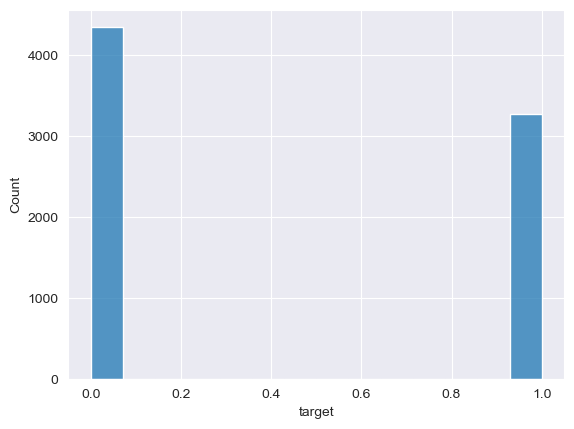

In [29]:
print('count of each label:', df['target'].value_counts())
print('percent of true label:', round(len(df[df['target'] == 1]) / len(df['target']) * 100, 2), '%')
sns.histplot(df.target)

about 43% of the labels are True and 57% are False
So the data is balanced and has adequate amount of samples for both labels

In [44]:
df['words_count'] = df.text.apply(len)

Text(0.5, 0, 'words count')

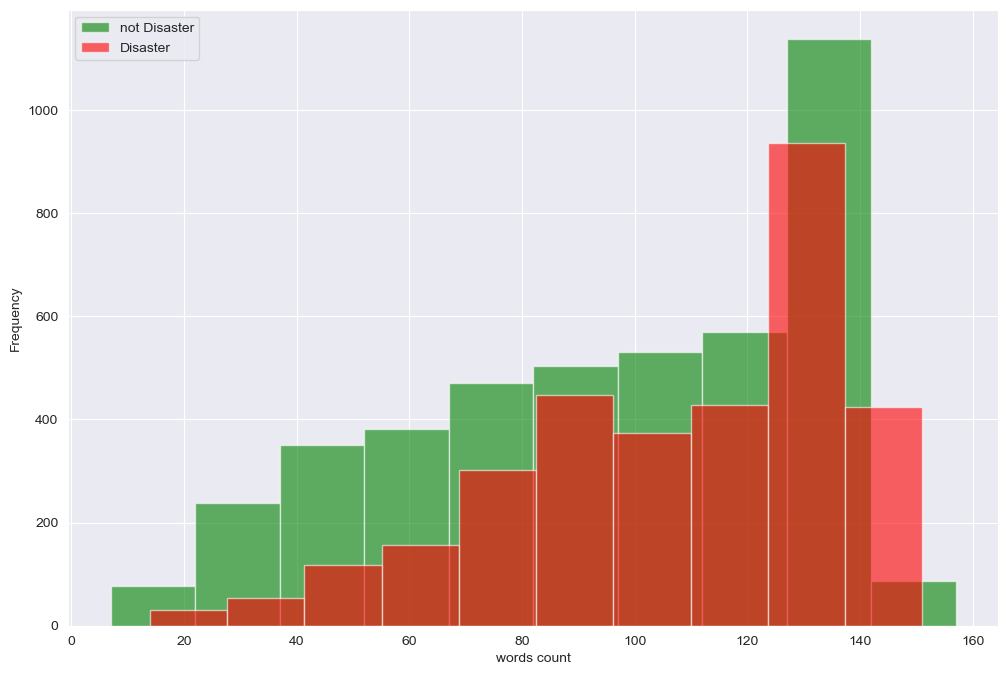

In [48]:
plt.figure(figsize=(12, 8))

df[df.target == 0].words_count.plot(kind='hist', color='green',
                                    label='not Disaster', alpha=0.6)
df[df.target == 1].words_count.plot(kind='hist', color='red',
                                    label='Disaster', alpha=0.6)
plt.legend()
plt.xlabel("words count")

as you can see, the length of the text does not give an incisive distinction between emergency and non-emergency labels as they follow the similar distribution. However, it seems that non-disaster texts has a bit more words than disaster texts.
we may need to look more into the text column:

# exploring the text column

In [42]:
text = df['text'].str.cat(sep=' ')
text[:1000]

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask. Canada All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 13,000 people receive #wildfires evacuation orders in California  Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas I'm on top of the hill and I can see a fire in the woods... There's an emergency evacuation happening now in the building across the street I'm afraid that the tornado is coming to our area... Three people died from the heat wave so far Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding #raining #flooding #Florida

In [35]:
def get_words_count(words: str):
    return Counter(words.split(' '))

In [38]:
get_words_count(text).most_common(20)

[('the', 2573),
 ('a', 1840),
 ('to', 1804),
 ('in', 1757),
 ('of', 1721),
 ('and', 1301),
 ('I', 1186),
 ('for', 820),
 ('is', 814),
 ('on', 773),
 ('', 770),
 ('-', 762),
 ('you', 631),
 ('my', 547),
 ('The', 541),
 ('with', 508),
 ('that', 491),
 ('at', 485),
 ('by', 467),
 ('it', 432)]

As you can see, there are words which are common in all texts and are not a good identification for using in the model for prediction.
such as 'the', 'a', 'to', 'in', 'of', 'and', ...
we can eliminate these words by stopwords from nltk.corpus package

In [43]:
stopwords.words('english')[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

we also need to remove the punctuation from text in order to analyze it better

In [50]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
def text_process(mess: str):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower().strip()
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [54]:
df['clean_text'] = df['text'].apply(text_process)
df.head()

,keyword,location,text,target,words_count,clean_text
id,,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,deeds reason earthquake may allah forgive us
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,residents asked shelter place notified officer...
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,13000 people receive wildfires evacuation orde...
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo ruby alaska smoke wildfires pou...


Text(0.5, 0, 'clean words count')

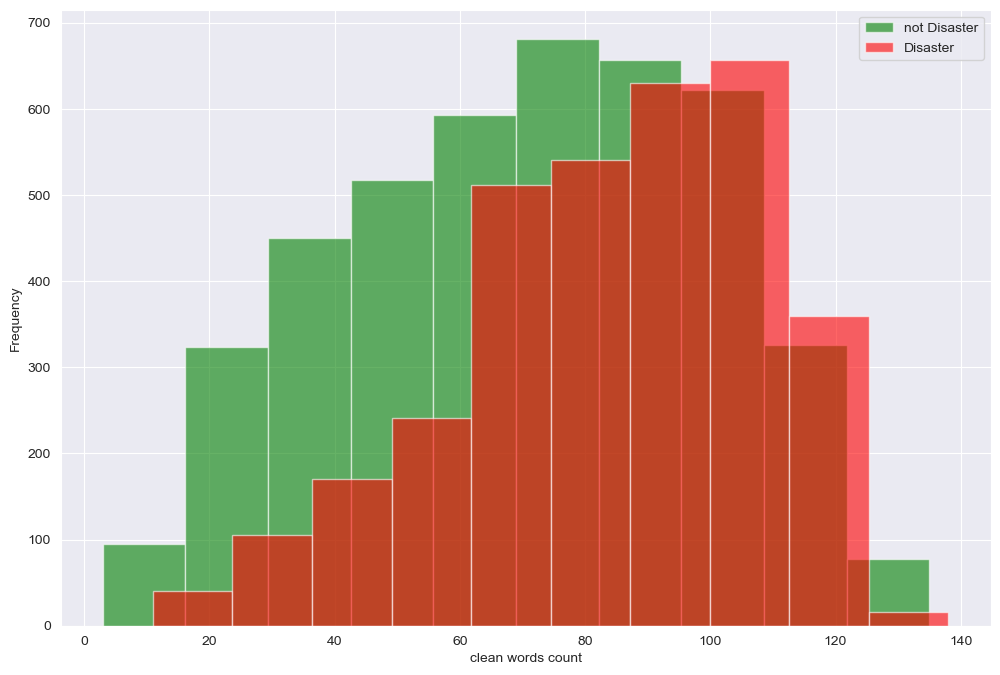

In [55]:
df['clean_words_count'] = df['clean_text'].apply(len)

plt.figure(figsize=(12, 8))

df[df.target == 0].clean_words_count.plot(kind='hist', color='green',
                                    label='not Disaster', alpha=0.6)
df[df.target == 1].clean_words_count.plot(kind='hist', color='red',
                                    label='Disaster', alpha=0.6)
plt.legend()
plt.xlabel("clean words count")

like before, both groups are following the same distribution. However, it seems that now count of disaster words are a bit longer than the other group after removing neutral words. 

In [56]:
clean_text = df['clean_text'].str.cat(sep=' ')
text[:1000]

"Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask. Canada All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected 13,000 people receive #wildfires evacuation orders in California  Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school  #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas I'm on top of the hill and I can see a fire in the woods... There's an emergency evacuation happening now in the building across the street I'm afraid that the tornado is coming to our area... Three people died from the heat wave so far Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding #raining #flooding #Florida

In [57]:
get_words_count(clean_text).most_common(20)

[('like', 345),
 ('im', 299),
 ('amp', 298),
 ('fire', 250),
 ('get', 229),
 ('new', 224),
 ('via', 220),
 ('people', 196),
 ('one', 193),
 ('news', 193),
 ('dont', 191),
 ('video', 165),
 ('us', 164),
 ('2', 159),
 ('emergency', 157),
 ('disaster', 152),
 ('police', 140),
 ('would', 131),
 ('still', 129),
 ('body', 124)]

now these words seem more likely to have correlation with the target label.
let's try and calculate that

In [11]:
all_words = (text.replace('#', '')
             .replace('-', '')
             .replace('.', '')
             # .replace('?', '') # new feature?
             # .replace('!', '') # new feature?
             .replace("'", '')
             .lower().strip())

all_words = re.sub('\s+', ' ', all_words)

In [12]:
from collections import Counter

word_counts = Counter(all_words.split(' '))
word_counts

Counter({'http://t': 4295,
         'the': 3263,
         'a': 2179,
         'in': 1971,
         'to': 1941,
         'of': 1823,
         'and': 1415,
         'i': 1387,
         '?': 1170,
         'is': 947,
         'for': 888,
         '!': 864,
         'on': 849,
         'you': 794,
         'my': 675,
         'it': 570,
         'with': 570,
         'that': 562,
         'at': 536,
         'by': 518,
         'this': 478,
         'from': 421,
         'https://t': 408,
         'are': 401,
         'be': 401,
         'was': 386,
         'have': 384,
         'like': 346,
         'as': 329,
         'but': 323,
         'me': 321,
         'up': 318,
         'just': 317,
         'so': 316,
         'im': 301,
         '&amp;': 298,
         'not': 296,
         'your': 293,
         'its': 267,
         'out': 266,
         'will': 258,
         'after': 257,
         'all': 256,
         'no': 254,
         'an': 250,
         'has': 248,
         'fire': 247,
    

In [74]:
df_train['_it_flag'] = ('it' in df_train['text'])

In [99]:
from sklearn.metrics import mutual_info_score
from sklearn.metrics import log_loss

mutual_info_score(df_train['_it_flag'], df_train['target'])
log_loss(df_train['target'], df_train['flag'])

15.486508634677811

per each word calc mutual_info_score or entropy

In [ ]:
def my_imaginary_score(labels_true, labels_pred):


In [129]:
neutral_words = ['you', 'my', 'so', 'or', 'him', 'in', 'at', 'as', 'of', 'it', 'like', 'your', 'after', 'with', 'were']
frequency_threshold = 20
mutual_info_threshold = 0.0025

counter = 0
for word, frequency in word_counts.most_common():
    if frequency < frequency_threshold:
        break

    if len(word) == 1:
        continue

    if word.isnumeric():
        continue

    if word in neutral_words:
        continue

    mi = mutual_info_score(df_train['target'], df_train['text'].str.contains(re.escape(word)))
    if mi > mutual_info_threshold:
        print(f'{word} has repeated {frequency} times with mi score of {mi}')
        counter += 1

print(counter)

http://t has repeated 4295 times with mi score of 0.036680015427320745
fire has repeated 247 times with mi score of 0.010596438661290605
were has repeated 166 times with mi score of 0.0027662886225055076
storm has repeated 116 times with mi score of 0.004803909728409564
suicide has repeated 116 times with mi score of 0.006293043319060287
bomb has repeated 103 times with mi score of 0.007464872848751421
fires has repeated 100 times with mi score of 0.004957658704881291
killed has repeated 96 times with mi score of 0.007982342035587196
crash has repeated 94 times with mi score of 0.00320718416818239
train has repeated 93 times with mi score of 0.0036672413627186467
families has repeated 88 times with mi score of 0.004405147147560081
bombing has repeated 67 times with mi score of 0.00533332611786029
fatal has repeated 65 times with mi score of 0.0029055179160786156
wildfire has repeated 64 times with mi score of 0.0047845182599147214
bomber has repeated 61 times with mi score of 0.0060256

In [115]:
len(df_train)

7613

In [132]:
df_train[df_train['text'].str.contains(re.escape('la'))]['text']

2       All residents asked to 'shelter in place' are ...
4       Just got sent this photo from Ruby #Alaska as ...
6       #flood #disaster Heavy rain causes flash flood...
26                                  Was in NYC last week!
31      @bbcmtd Wholesale Markets ablaze http://t.co/l...
                              ...                        
7595    NWS: Flash Flood Warning Continued for Shelby ...
7597    #??? #?? #??? #??? MH370: Aircraft debris foun...
7603    Officials say a quarantine is in place at an A...
7607    #stormchase Violent Record Breaking EF-5 El Re...
7608    Two giant cranes holding a bridge collapse int...
Name: text, Length: 1989, dtype: object

In [ ]:
#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas